In [1]:
!sudo apt-get install -y fonts-nanum* | tail -n 1
!sudo fc-cache -fv
!rm -rf ~/.cache/matplotlib

debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 4.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 39 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no suc

In [1]:
# 라이브러리 임포트

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

# 폰트 관련 용도
import matplotlib.font_manager as fm

# Colab, Linux
# 나눔 고딕 폰트의 경로 명시
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name()

# Window
# font_name = "NanumBarunGothic"

# Mac
# font_name = "AppleGothic"

# 기본 폰트 설정
plt.rcParams['font.family'] = font_name

# 기본 폰트 사이즈 변경
plt.rcParams['font.size'] = 14

# 기본 그래프 사이즈 변경
plt.rcParams['figure.figsize'] = (6,6)

# 기본 그리드 표시
# 필요에 따라 설정할 때는, plt.grid()
plt.rcParams['axes.grid'] = True
plt.rcParams["grid.linestyle"] = ":"

# 마이너스 기호 정상 출력
plt.rcParams['axes.unicode_minus'] = False

# 넘파이 부동소수점 자릿수 표시
np.set_printoptions(suppress=True, precision=4)

In [78]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
!pip install torchviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 96.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 68.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 44.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 76.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [6]:
x = torch.arange(-2, 2.1, 0.5, requires_grad=True)
print("x =\n", x)

y = 2*x**2 + 2
print("y =\n", y)

z = y.sum()
print("z =\n", z)

x =
 tensor([-2.0000, -1.5000, -1.0000, -0.5000,  0.0000,  0.5000,  1.0000,  1.5000,
         2.0000], requires_grad=True)
y =
 tensor([10.0000,  6.5000,  4.0000,  2.5000,  2.0000,  2.5000,  4.0000,  6.5000,
        10.0000], grad_fn=<AddBackward0>)
z =
 tensor(48., grad_fn=<SumBackward0>)


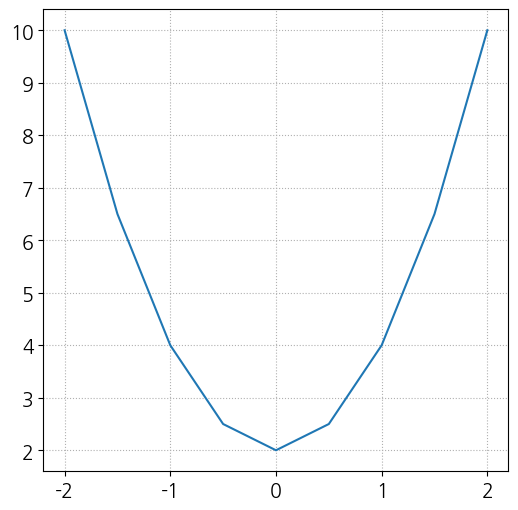

In [7]:
plt.plot(x.data, y.data)
plt.show()

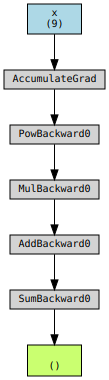

In [16]:
from torchviz import make_dot

g = make_dot(z, params={"x": x})
display(g)

In [17]:
print(x.grad)
z.backward()
print(x.grad)

tensor([-8., -6., -4., -2.,  0.,  2.,  4.,  6.,  8.])


RuntimeError: Trying to backward through the graph a second time (or directly access saved tensors after they have already been freed). Saved intermediate values of the graph are freed when you call .backward() or autograd.grad(). Specify retain_graph=True if you need to backward through the graph a second time or if you need to access saved tensors after calling backward.

x =
 tensor([-5.0000e+00, -4.9000e+00, -4.8000e+00, -4.7000e+00, -4.6000e+00,
        -4.5000e+00, -4.4000e+00, -4.3000e+00, -4.2000e+00, -4.1000e+00,
        -4.0000e+00, -3.9000e+00, -3.8000e+00, -3.7000e+00, -3.6000e+00,
        -3.5000e+00, -3.4000e+00, -3.3000e+00, -3.2000e+00, -3.1000e+00,
        -3.0000e+00, -2.9000e+00, -2.8000e+00, -2.7000e+00, -2.6000e+00,
        -2.5000e+00, -2.4000e+00, -2.3000e+00, -2.2000e+00, -2.1000e+00,
        -2.0000e+00, -1.9000e+00, -1.8000e+00, -1.7000e+00, -1.6000e+00,
        -1.5000e+00, -1.4000e+00, -1.3000e+00, -1.2000e+00, -1.1000e+00,
        -1.0000e+00, -9.0000e-01, -8.0000e-01, -7.0000e-01, -6.0000e-01,
        -5.0000e-01, -4.0000e-01, -3.0000e-01, -2.0000e-01, -1.0000e-01,
        -2.9802e-09,  1.0000e-01,  2.0000e-01,  3.0000e-01,  4.0000e-01,
         5.0000e-01,  6.0000e-01,  7.0000e-01,  8.0000e-01,  9.0000e-01,
         1.0000e+00,  1.1000e+00,  1.2000e+00,  1.3000e+00,  1.4000e+00,
         1.5000e+00,  1.6000e+00,  1.7000e+00,

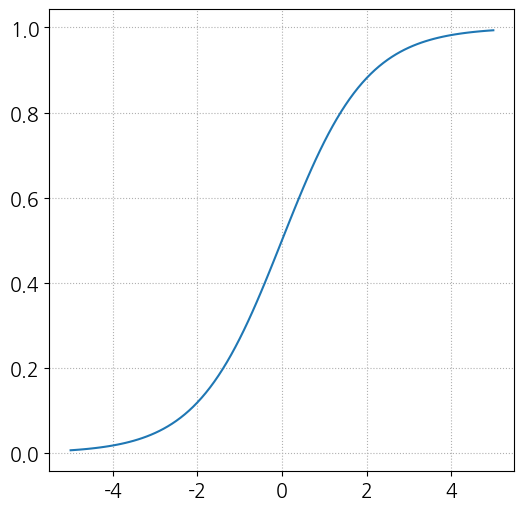

In [18]:
## Sigmoid

x = torch.arange(-5, 5.1, 0.1, requires_grad=True)
print("x =\n", x)

# y = 1 / (1 + np.exp(-x.detach().numpy()))
sigmoid = torch.nn.Sigmoid()
y = sigmoid(x)

plt.plot(x.data, y.data)
plt.show()

In [21]:
print(x.grad)
z = y.sum()
z.backward()

print(x.grad)

tensor([0.0066, 0.0073, 0.0081, 0.0089, 0.0099, 0.0109, 0.0120, 0.0132, 0.0146,
        0.0160, 0.0177, 0.0194, 0.0214, 0.0235, 0.0259, 0.0285, 0.0313, 0.0343,
        0.0376, 0.0412, 0.0452, 0.0494, 0.0540, 0.0590, 0.0644, 0.0701, 0.0763,
        0.0828, 0.0898, 0.0972, 0.1050, 0.1132, 0.1217, 0.1306, 0.1398, 0.1491,
        0.1587, 0.1683, 0.1779, 0.1874, 0.1966, 0.2055, 0.2139, 0.2217, 0.2288,
        0.2350, 0.2403, 0.2445, 0.2475, 0.2494, 0.2500, 0.2494, 0.2475, 0.2445,
        0.2403, 0.2350, 0.2288, 0.2217, 0.2139, 0.2055, 0.1966, 0.1874, 0.1779,
        0.1683, 0.1587, 0.1491, 0.1398, 0.1306, 0.1217, 0.1132, 0.1050, 0.0972,
        0.0898, 0.0828, 0.0763, 0.0701, 0.0644, 0.0590, 0.0540, 0.0494, 0.0452,
        0.0412, 0.0376, 0.0343, 0.0313, 0.0285, 0.0259, 0.0235, 0.0214, 0.0194,
        0.0177, 0.0160, 0.0146, 0.0132, 0.0120, 0.0109, 0.0099, 0.0089, 0.0081,
        0.0073, 0.0066])


RuntimeError: Trying to backward through the graph a second time (or directly access saved tensors after they have already been freed). Saved intermediate values of the graph are freed when you call .backward() or autograd.grad(). Specify retain_graph=True if you need to backward through the graph a second time or if you need to access saved tensors after calling backward.

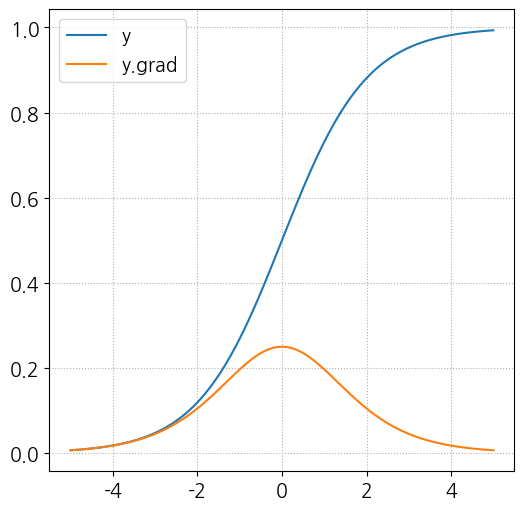

In [22]:
plt.plot(x.data, y.data, label='y')
plt.plot(x.data, x.grad.data, label='y.grad')
plt.legend()
plt.show()

In [23]:
def perceptron(x, w, b=0):
  if not isinstance(x, np.ndarray) or not isinstance(w, np.ndarray):
    x = np.array(x)
    w = np.array(w)

  y = np.sum(w*x) + b
  return y

In [36]:
x = np.random.randint(0, 10, (5, ))
print("x =", x)
w = np.random.randint(0, 10, (5,))
print("w =", w)

y = perceptron(x, w)
print("y =", y)

x = [8 7 7 2 7]
w = [8 0 4 0 1]
y = 99


In [37]:
def perceptron2(x):
  if not isinstance(x, np.ndarray):
    x = np.array(x)

  w = np.random.rand(len(x))
  b = np.random.rand()
  print("w =", w, "b =", b)
  y = np.sum(x*w) + b
  return y

In [38]:
x = np.random.randint(0, 10, (6,))
print("x =", x)

y = perceptron2(x)
print("y =\n", y)

x = [2 4 6 0 7 2]
w = [0.7476 0.2136 0.4309 0.7094 0.8405 0.4703] b = 0.25480059111503117
y =
 12.01389439730269


In [39]:
## nn.Linear
from torch import nn

In [41]:
input_size = 6
output_size = 12

y = nn.Linear(input_size, output_size) ## perceptron

print("weights = \n", y.weight)
print("bias = \n", y.bias)



weights = 
 Parameter containing:
tensor([[-0.2280, -0.2294,  0.3205,  0.3686, -0.3137, -0.0672],
        [ 0.3946, -0.2159, -0.3644, -0.2212,  0.1108,  0.2247],
        [-0.3189,  0.0151, -0.3819, -0.0302,  0.1970,  0.1262],
        [-0.1957, -0.0225,  0.1001, -0.0589,  0.0558,  0.2958],
        [-0.3263, -0.2981, -0.1710,  0.1887,  0.0339, -0.0314],
        [-0.1078, -0.1928,  0.1419, -0.0821, -0.2520, -0.2295],
        [-0.2109, -0.0620, -0.3689,  0.1621,  0.0920, -0.0813],
        [ 0.2688, -0.0805,  0.2609, -0.3497,  0.3744,  0.1683],
        [ 0.1482, -0.1692,  0.1661,  0.3629,  0.2581,  0.1942],
        [ 0.3981, -0.0529, -0.0014,  0.3793,  0.1641,  0.3634],
        [-0.2283, -0.3156, -0.3952,  0.1727,  0.2720,  0.0938],
        [-0.2199, -0.2685, -0.2337, -0.1360, -0.1875,  0.2337]],
       requires_grad=True)
bias = 
 Parameter containing:
tensor([-0.2378, -0.2559,  0.1899,  0.0014, -0.1779, -0.2824,  0.0840,  0.2131,
        -0.3737,  0.1369, -0.2509,  0.0076], requires_grad=

In [42]:
## Forward process

def perceptron(x):
  w = np.random.rand(len(x))
  b = np.random.rand()
  y = np.sum(w*x) + b
  return y

def sigmoid(x):
  y = 1 / (1 + np.exp(-x))
  return y

x = np.random.rand(5)
y = perceptron(x)
p = sigmoid(y)

print("p =", p)

p = 0.767215647188903


In [44]:
## 활성화 함수

def activation_plot(x, y, title:str):
  plt.plot(x, y)
  plt.title(title)
  plt.show()

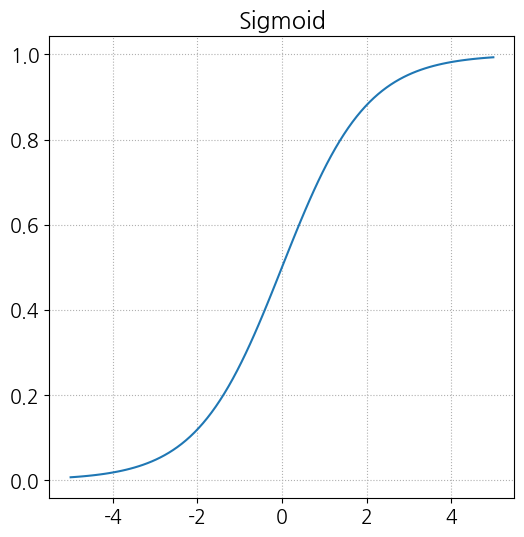

In [50]:
x = np.linspace(-5, 5, 100) # numpy
# print(x)

# def sigmoid(x, w=1):
#   y = 1 / (1 + np.exp(-w*x))
#   return y
# y = sigmoid(x)

## torch
nn_sigmoid = nn.Sigmoid()
tensor_y = nn_sigmoid(torch.tensor(x))

activation_plot(x, tensor_y, "Sigmoid")

In [47]:
def tanh(x):
  y = (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))
  return y

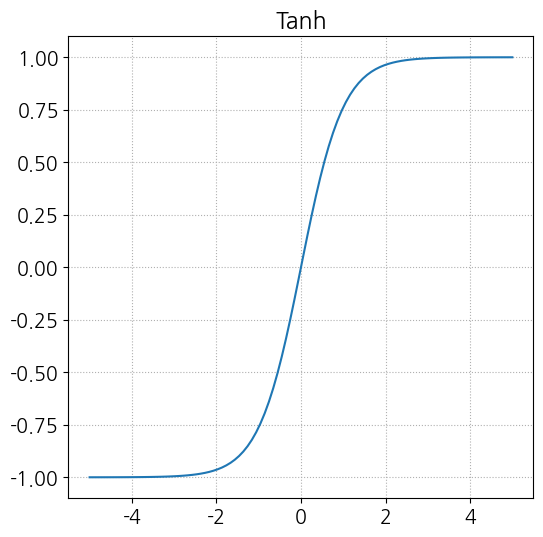

In [52]:
y = tanh(x)
# activation_plot(x, y, "Tanh")

##
nn_tanh = nn.Tanh()
tensor_y = nn_tanh(torch.tensor(x))
activation_plot(x, tensor_y, "Tanh")

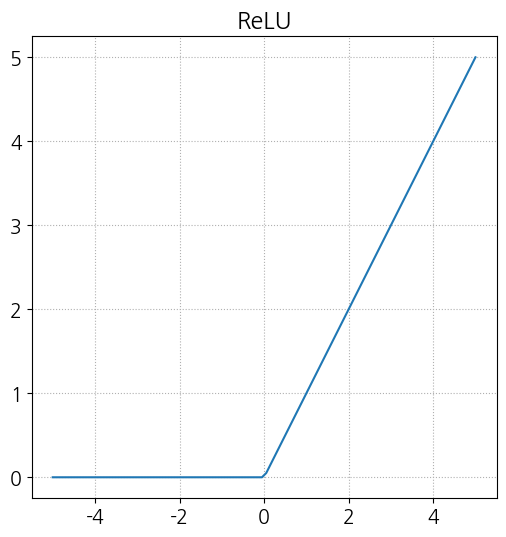

In [55]:
def relu(x):
  y = np.maximum(0, x)
  return y

y = relu(x)
# activation_plot(x, y, "ReLU")

nn_relu = nn.ReLU()
tensor_y = nn_relu(torch.tensor(x))
activation_plot(x, tensor_y, "ReLU")

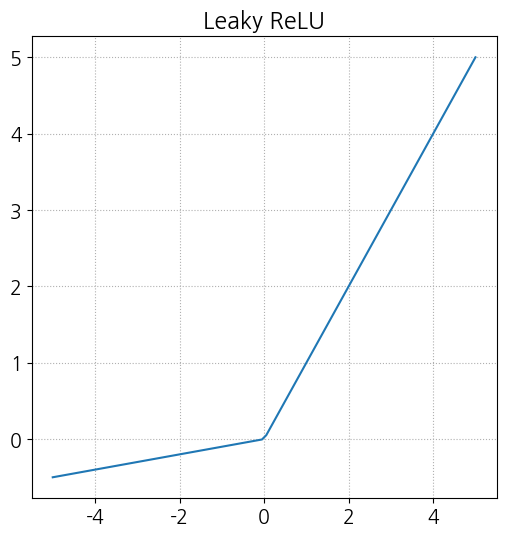

In [64]:
## Leaky ReLU
def leakyrelu(x, alpha:float):
  y = np.maximum(alpha*x, x)
  return y

y = leakyrelu(x, 0.1)
# activation_plot(x, y, "Leaky ReLU")

nn_leakyrelu = nn.LeakyReLU(0.1)
tensor_y = nn_leakyrelu(torch.tensor(x))
activation_plot(x, tensor_y, "Leaky ReLU")

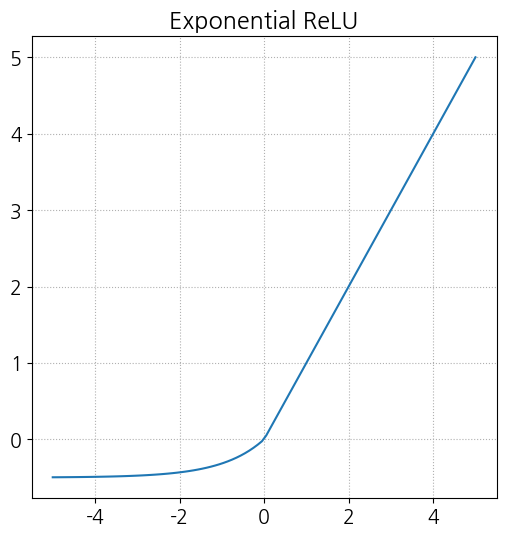

In [76]:
## Exponential ReLU

def erelu(x, alpha):
  # if x >= 0:
  #   y = x
  # else:
  #   y = alpha*(np.exp(x) - 1)

  y = (x >= 0)*x + (x < 0)*(alpha*(np.exp(x) - 1))
  return y

# y = erelu(x, 0.5)
# activation_plot(x, y, "Exponential ReLU")

nn_erelu = nn.ELU(0.5)
tensor_y = nn_erelu(torch.tensor(x))
activation_plot(x, tensor_y, "Exponential ReLU")

In [84]:
##
sampleData1 = np.array([
    [166, 58.7],
    [176., 75.7],
    [171., 62.1],
    [173., 74.4],
    [169., 60.1]
])

print('sampleData1 = \n', sampleData1)

x = sampleData1[:, 0] # height
y = sampleData1[:, 1] # weight

sampleData1 = 
 [[166.   58.7]
 [176.   75.7]
 [171.   62.1]
 [173.   74.4]
 [169.   60.1]]


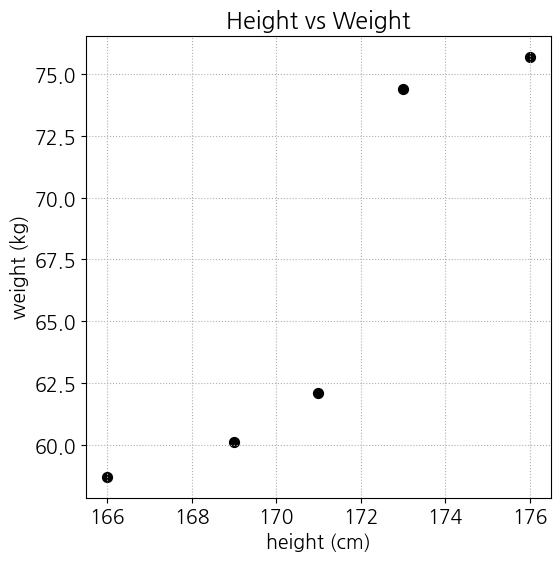

In [88]:
plt.scatter(x, y, c='k', s=50)
plt.xlabel("height (cm)")
plt.ylabel("weight (kg)")
plt.title("Height vs Weight")
plt.show()

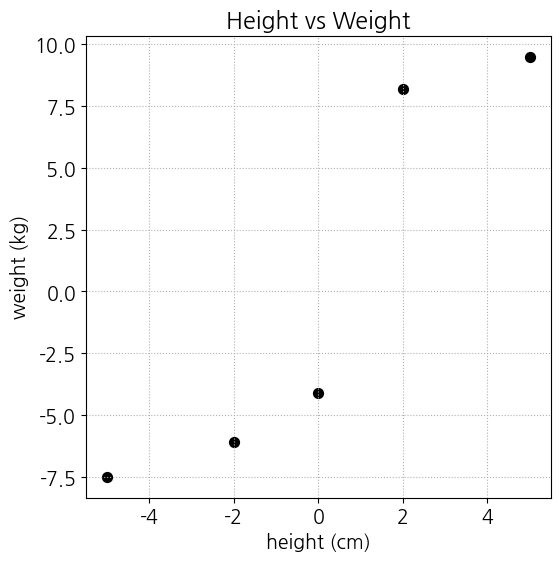

In [90]:
## 데이터 변환
## mean centering
X = x - x.mean()
Y = y - y.mean()

plt.scatter(X, Y, c='k', s=50)
plt.xlabel("height (cm)")
plt.ylabel("weight (kg)")
plt.title("Height vs Weight")
plt.show()

In [92]:
##
X = torch.tensor(X)
Y = torch.tensor(Y)

print("X dtype", X.dtype)
print("Y dtype", Y.dtype)

X dtype torch.float64
Y dtype torch.float64


<ipython-input-92-557a5b1a83b3>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X = torch.tensor(X)
<ipython-input-92-557a5b1a83b3>:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  Y = torch.tensor(Y)


In [97]:
##
W = torch.tensor(1.0, requires_grad=True)
B = torch.tensor(1.0, requires_grad=True)

print("W =", W)
print("B =", B)

W = tensor(1., requires_grad=True)
B = tensor(1., requires_grad=True)


In [98]:
def pred(X):
    return W * X + B

Yp = pred(X)

In [99]:
def mse(Yp, Y):
  loss = ((Yp - y)**2).mean()
  return loss

In [100]:
loss = mse(Yp, Y)
print("mse loss =", loss)

RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.